# Assignment No 2

Submitted By : Muhammad Sarmad Saleem

Class: CS 12 A

CMS:411411

# Rock Classification Task Using Linear and RBF SVM

The Rock Classification Dataset contains various physical attributes of rock and mineral
samples. The goal of this dataset is to classify the type of rock or mineral based on its measurable
characteristics. The dataset consists of several features related to the shape and size of the samples,
which are used to determine their classification.


# Data Exploration and Preprocessing

Importing Data

In [39]:
import numpy as np
import pandas as pd


data=pd.read_csv("/content/rock_classification_dataset.csv")


Checking the values of dataset

In [40]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,1
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,1
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,1


Printing the shape of dataset

In [41]:
data.shape

(13611, 17)

Describing and Info of Dataset

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

In [43]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,4.631181
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,2.151782
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,1.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,3.000000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,5.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,7.000000
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,7.000000


Checking For null values

In [44]:
data.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


As we see above we dont have any null value in our dataset so we can proceed further

#Visualize distributions

**Histogram**

**Normal Distribution**	Symmetric, bell-shaped curve with a single peak; smooth tails tapering off on both sides.



**Outliers**	Isolated bars away from the main distribution; long tails with sparse values.


**Skewed Distribution**	Asymmetry with peak shifted to one side; long tail stretching in one direction.


**Data Imbalance**	Dense bars in one region, sparse bars in another; very high or low frequency for certain values.

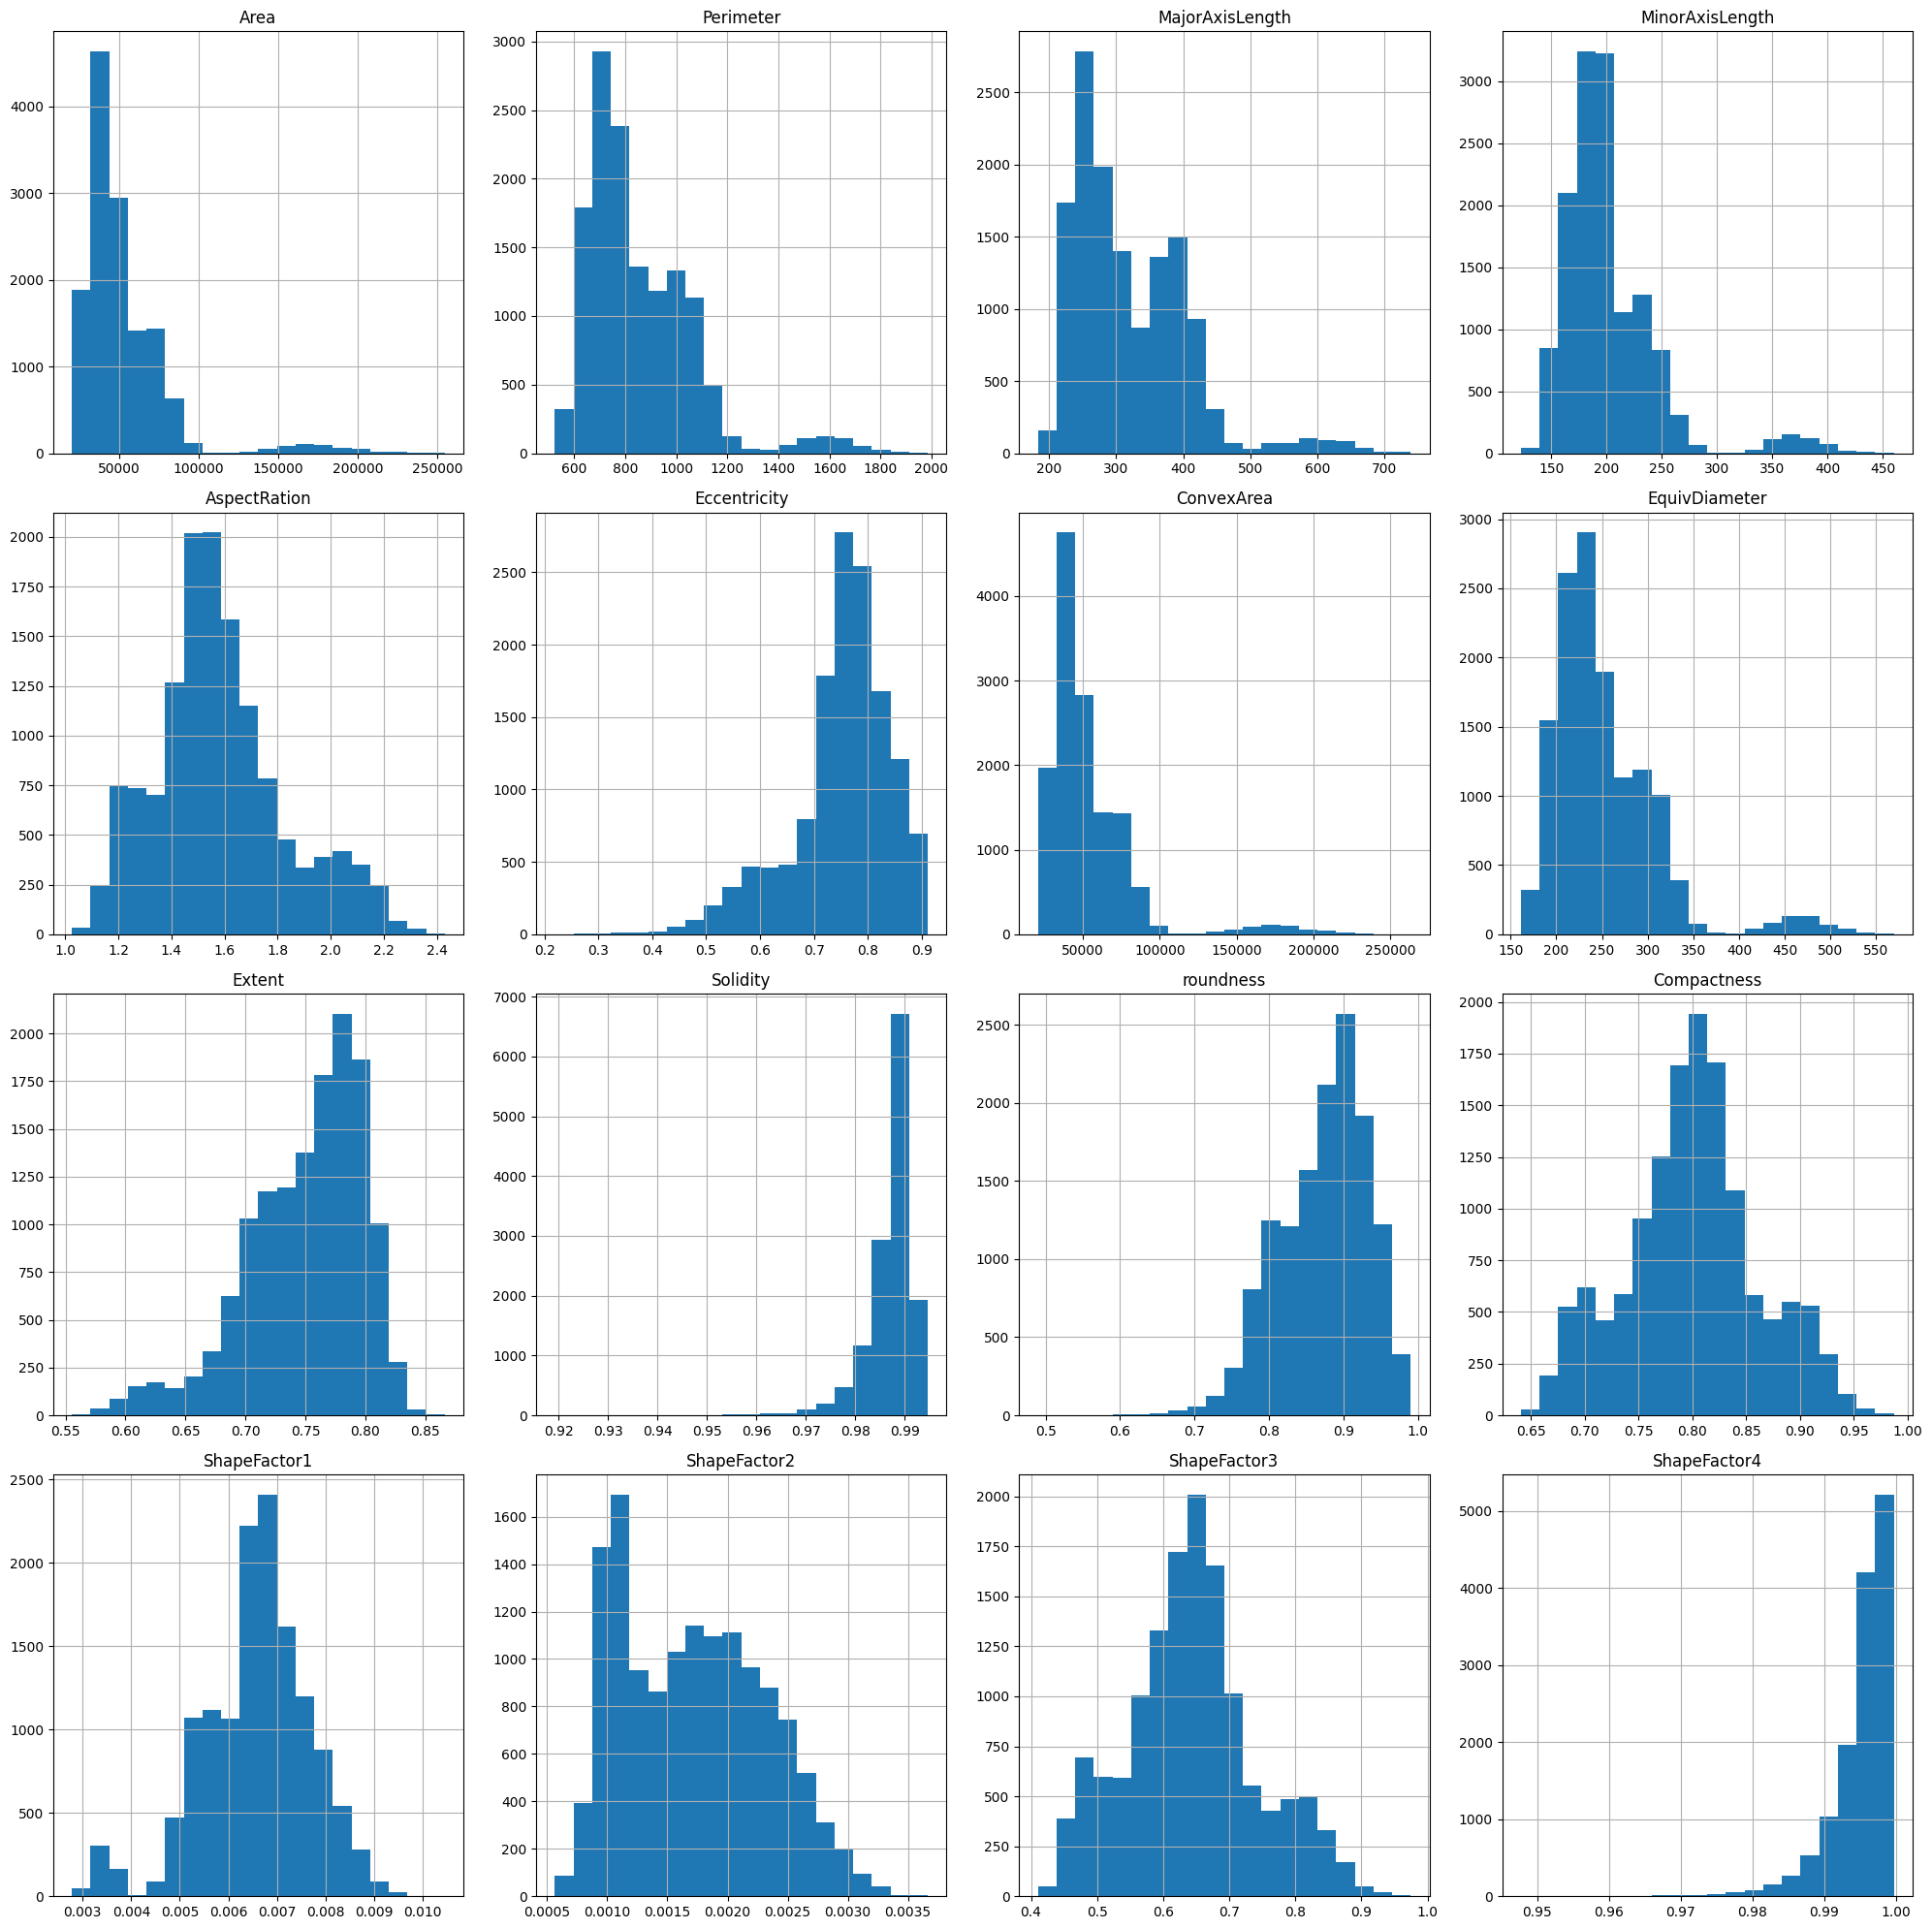

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


data.iloc[:, :-1].hist(bins=20, figsize=(20, 20))

plt.tight_layout()
plt.show()

As seeing above many classes contain outliers which are as follows: Area

1.Perimeter

2.MajorAxisLength

3.MinorAxisLength

4.ConvexArea

5.EquivDiameter

# Box Plot
Use box plots to identify outliers

In a boxplot, the vertical lines outside the box are called whiskers. These whiskers represent the range of data values that fall within a specific range determined by the 1.5 * IQR rule. The lower whisker extends from the first quartile (Q1) to the smallest data point that is at most 1.5 times the interquartile range (IQR) below Q1. Similarly, the upper whisker extends from the third quartile (Q3) to the largest data point that is at most 1.5 times the IQR above Q3. Any data points that lie beyond the whiskers are considered outliers and are typically represented as individual points or symbols outside the whiskers. This visual distinction allows us to quickly identify values that deviate significantly from the main distribution of the dat

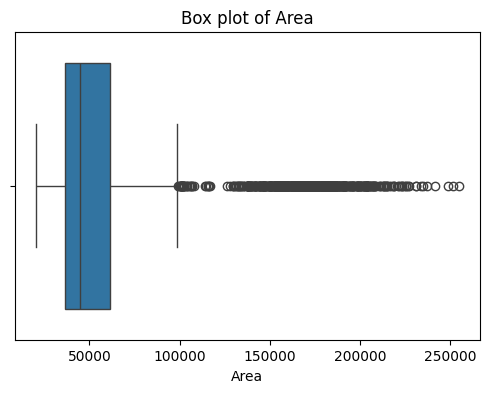

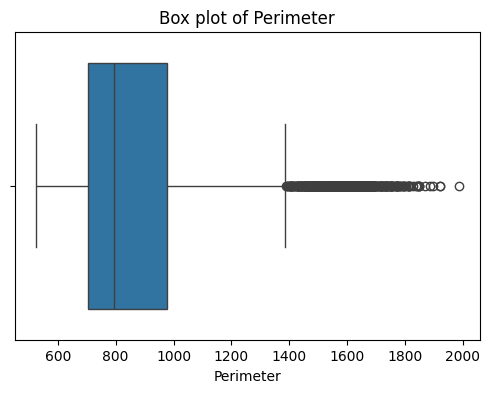

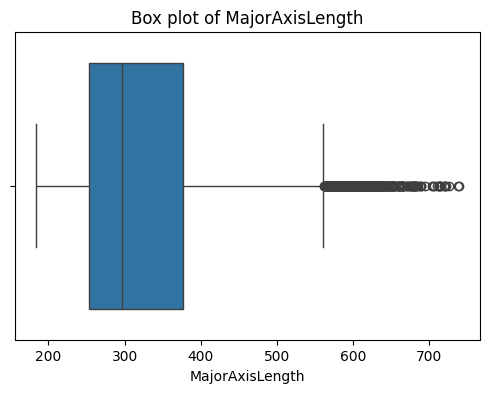

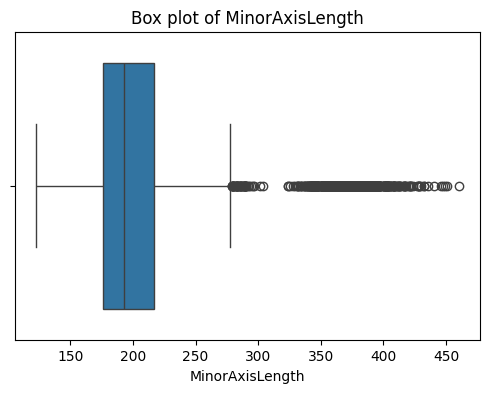

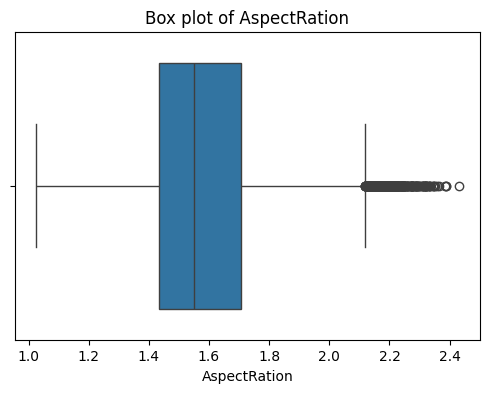

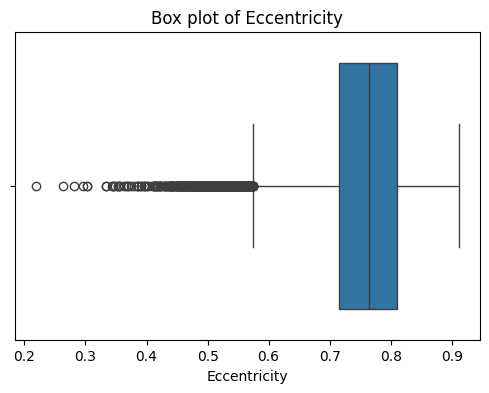

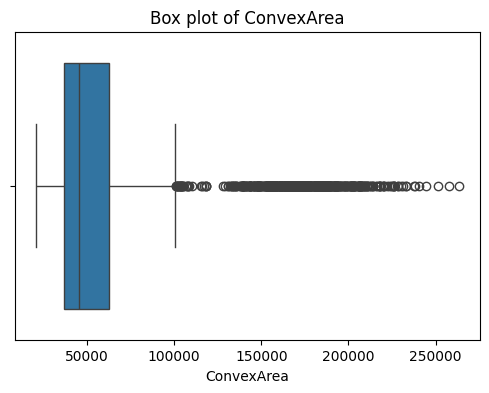

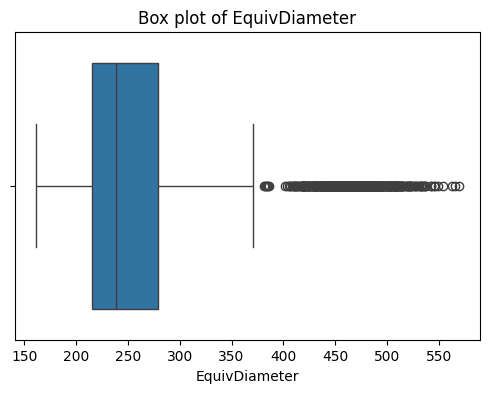

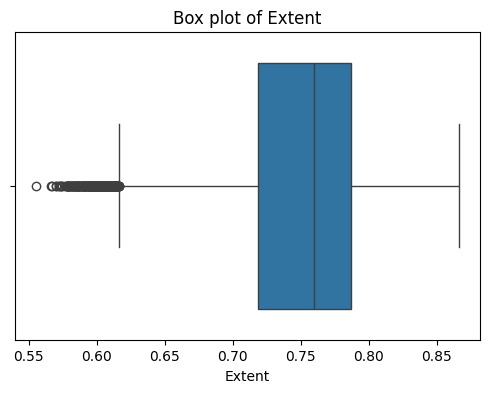

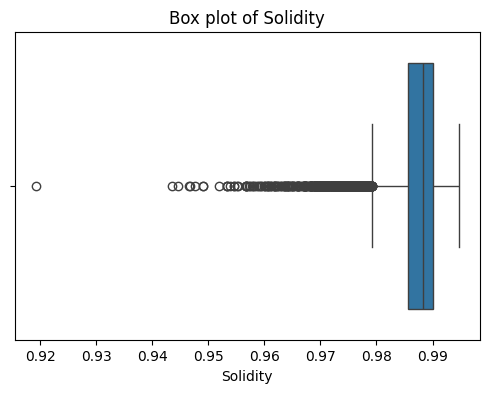

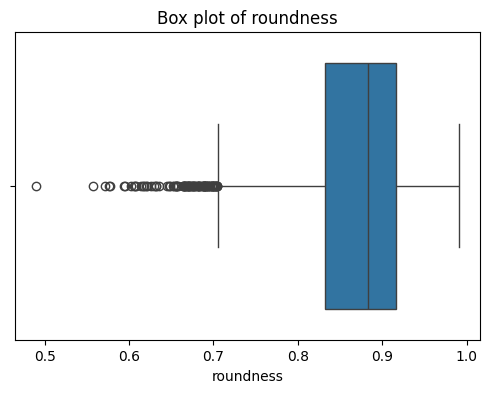

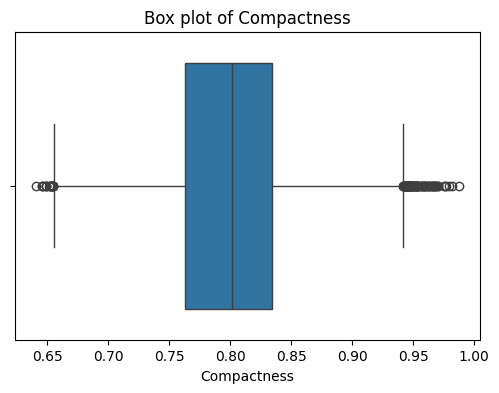

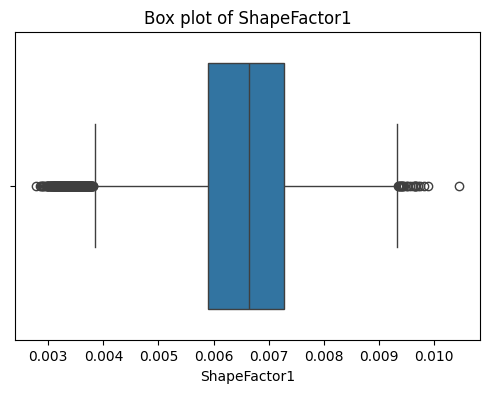

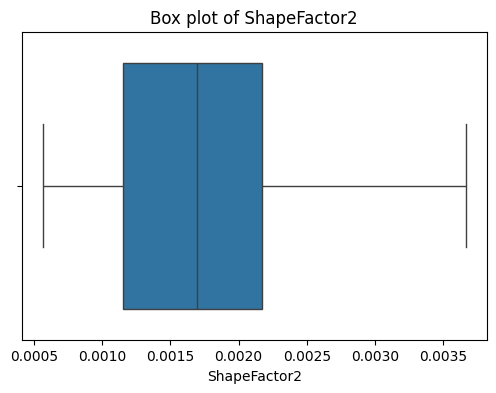

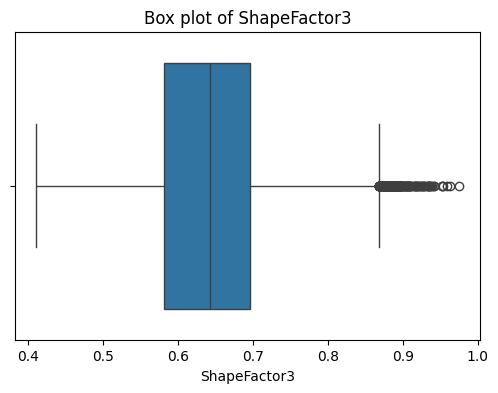

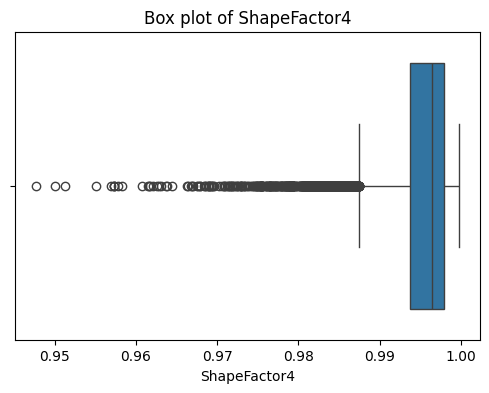

In [46]:

for column in data.columns[:-1]:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data,x=column)
  plt.title(f'Box plot of {column}')
  plt.show()

#Z Score Method :
To check percentage of outliers

In [47]:
from scipy.stats import zscore

for col in data.columns[:-1]:
    # Calculate Z-scores for the column, excluding NaN values
    z_scores = zscore(data[col].dropna())
    # Identify outliers as values with |Z-score| > 3
    outliers = (abs(z_scores) > 3).sum()
    # Calculate the percentage of outliers
    percentage_outliers = (outliers / len(z_scores)) * 100

    print(f'{col}: Number of outliers = {outliers}, Percentage = {percentage_outliers:.2f}%')


Area: Number of outliers = 483, Percentage = 3.55%
Perimeter: Number of outliers = 404, Percentage = 2.97%
MajorAxisLength: Number of outliers = 316, Percentage = 2.32%
MinorAxisLength: Number of outliers = 508, Percentage = 3.73%
AspectRation: Number of outliers = 15, Percentage = 0.11%
Eccentricity: Number of outliers = 125, Percentage = 0.92%
ConvexArea: Number of outliers = 483, Percentage = 3.55%
EquivDiameter: Number of outliers = 465, Percentage = 3.42%
Extent: Number of outliers = 135, Percentage = 0.99%
Solidity: Number of outliers = 238, Percentage = 1.75%
roundness: Number of outliers = 74, Percentage = 0.54%
Compactness: Number of outliers = 1, Percentage = 0.01%
ShapeFactor1: Number of outliers = 59, Percentage = 0.43%
ShapeFactor2: Number of outliers = 5, Percentage = 0.04%
ShapeFactor3: Number of outliers = 8, Percentage = 0.06%
ShapeFactor4: Number of outliers = 242, Percentage = 1.78%


# When To remove outliers?
**If Outliers Represent Noise:**

If the outliers are errors or anomalies that don't represent meaningful data, removing them can help the model focus on the true data distribution.
For example, if you suspect measurement errors or data entry mistakes, outlier removal is advisable.
**If the Data Is Small:**

In smaller datasets, outliers can have a disproportionately large influence on the model. Removing them may prevent distortion.
**For Models Sensitive to Outliers:**

Linear SVMs are more sensitive to outliers because outliers can significantly affect the position of the hyperplane. Removing outliers often improves the generalization of a linear SVM.

As there are no relatively high number of outliers we can ignore them for now but will test on both removing and  adding oultiers  while testing our model

# **2.2-Feature Scaling:**
**1- Standardization (Z-score normalization):**
Use when features are normally distributed

**2- Min-Max Scaling (Normalization):**
Use when you don't know the distribution of the data or want to constrain values between 0 and 1.


**Test for normailzation**


**Skewness = 0: Symmetrical (normal distribution)**


**Skewness > 0: Right-skewed (positive skewness)**



**Skewness < 0: Left-skewed (negative skewness)**

If **Skewness** is close to **0**: The data is normally distributed, and you can use the **mean** for imputation.
If Skewness is significantly **positive or negative**: The data is skewed, and it’s better to use the **median** for imputation.

In [48]:
for col in data.columns[:-1]:
  skewness=data[col].skew()
  print("Skewness of ",col," is",skewness)

Skewness of  Area  is 2.9529309714284606
Skewness of  Perimeter  is 1.6261235244866201
Skewness of  MajorAxisLength  is 1.3578152835457427
Skewness of  MinorAxisLength  is 2.2382105395651473
Skewness of  AspectRation  is 0.582573399255909
Skewness of  Eccentricity  is -1.0628239308671301
Skewness of  ConvexArea  is 2.9418211110165506
Skewness of  EquivDiameter  is 1.9489576094878978
Skewness of  Extent  is -0.8953484276830443
Skewness of  Solidity  is -2.5500931058430196
Skewness of  roundness  is -0.6357489503361226
Skewness of  Compactness  is 0.03711545808296861
Skewness of  ShapeFactor1  is -0.5341405486852819
Skewness of  ShapeFactor2  is 0.30122591882133765
Skewness of  ShapeFactor3  is 0.24248092661997728
Skewness of  ShapeFactor4  is -2.759482909435988


As most of the columns are not normally distributed and are skewed so in this case min max scaling is preferred

#Min Max Scaling

**Min-Max Scaling** transforms features by scaling them to a fixed range, typically [0, 1], using the formula \(x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}\).

In [49]:
from sklearn.preprocessing import MinMaxScaler


# Separate features (all columns except the last one) and the target (last column)
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled dataset
scaled_data['Class'] = target




In [50]:
scaled_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,1
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979,1
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,1
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,1
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,1


#Multicollinearity Handling

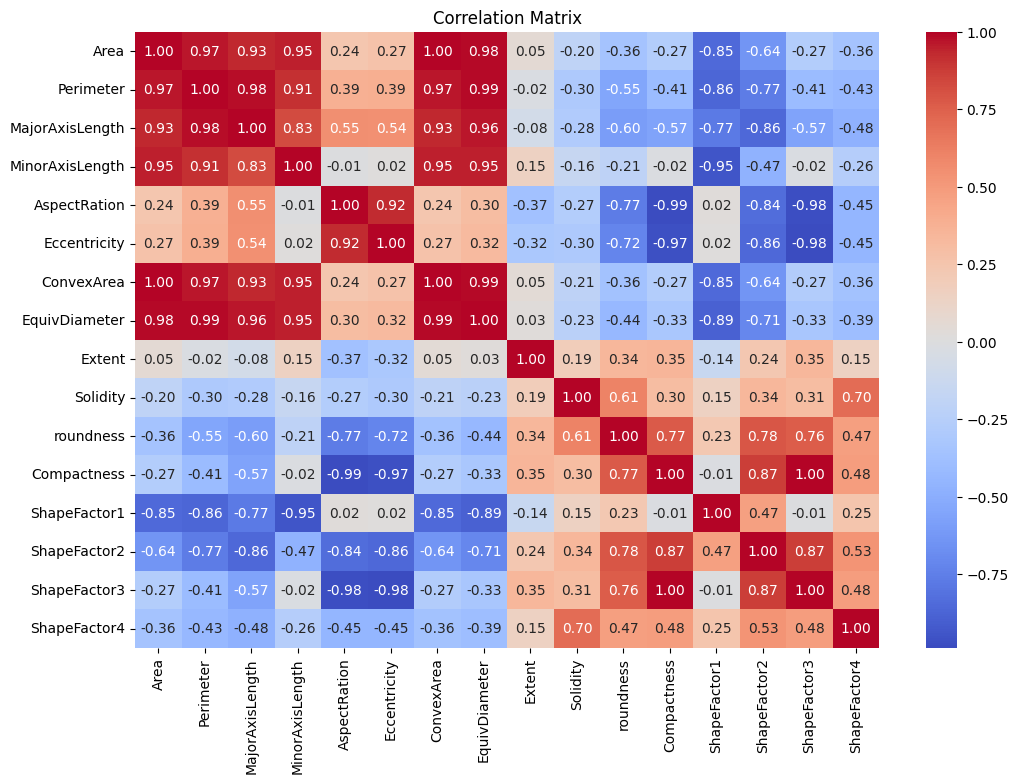

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols=scaled_data.columns[:-1]
# Calculating the correlation matrix
correlation_matrix = scaled_data[cols].corr()


# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


As you see above features are higly correlated  so we can use PCA here


# PCA
If you want to keep all the features but still address the multicollinearity issue, Principal Component Analysis (PCA) is an excellent technique. PCA transforms the original features into a smaller number of uncorrelated principal components that capture most of the variance in the data. This way, you can reduce dimensionality while addressing multicollinearity.

# Standard Scaling
For PCA data should be normalized accroding to stadnard scaling


In [52]:
from sklearn.preprocessing import StandardScaler

# Separate features (all columns except the last one) and the target (last column)
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Initialize the MinMaxScaler
scaler = StandardScaler()
# Apply MinMaxScaler to the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
stand_scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled dataset
stand_scaled_data['Class'] = target




In [53]:
stand_scaled_data.head()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,1
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138,1
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,1
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,1
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,1


**Applying PCA**

By  setting n_componenets as Maximum Likelihood Estimation


In [54]:
from sklearn.decomposition import PCA

pca=PCA(n_components="mle")
X_pca=pca.fit_transform(stand_scaled_data.iloc[:,:-1])

explained_variance=pca.explained_variance_ratio_
print("Explained variance by each feature",explained_variance)
print("Total explained variance",sum(explained_variance))



Explained variance by each feature [5.54664386e-01 2.64309732e-01 8.00656422e-02 5.11408029e-02
 2.73929290e-02 1.14976093e-02 6.97650724e-03 3.25082500e-03
 5.16266295e-04 9.08681206e-05 6.58867938e-05 1.83739336e-05
 9.29966038e-06 6.25641678e-07 1.34132086e-07]
Total explained variance 0.999999888450515


Making new Datframe using PCA columns

In [55]:
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
data_pca = pd.DataFrame(X_pca, columns=pca_columns)
data_pca["Class"]=stand_scaled_data["Class"]
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Class
0,-4.981561,1.824697,-0.749021,-0.390812,0.033531,0.301212,-0.610269,0.274802,0.235436,0.035378,-0.002807,-0.037495,-0.039865,0.000616,-0.002118,1
1,-5.436792,2.932365,-2.182374,-0.431960,-1.226464,0.045575,-1.691342,0.317654,0.177794,-0.101606,-0.145569,-0.120565,-0.042667,-0.004806,0.002274,1
2,-4.758088,1.826884,-0.514038,-0.125854,-0.131505,0.208538,-0.599563,0.162090,0.211931,0.024169,0.011086,-0.037477,-0.029293,-0.000971,-0.002489,1
3,-4.300541,2.003661,-3.554447,0.082964,-0.800766,0.502323,-0.659708,0.672622,0.142372,-0.032851,-0.028612,-0.075442,-0.022661,0.006646,0.002394,1
4,-6.349340,4.088205,-1.179199,-0.830357,0.037073,-0.278306,-1.728546,0.893425,0.000904,-0.133744,-0.329344,-0.028853,-0.080398,0.000978,0.011574,1


Correlation Matrix after PCA

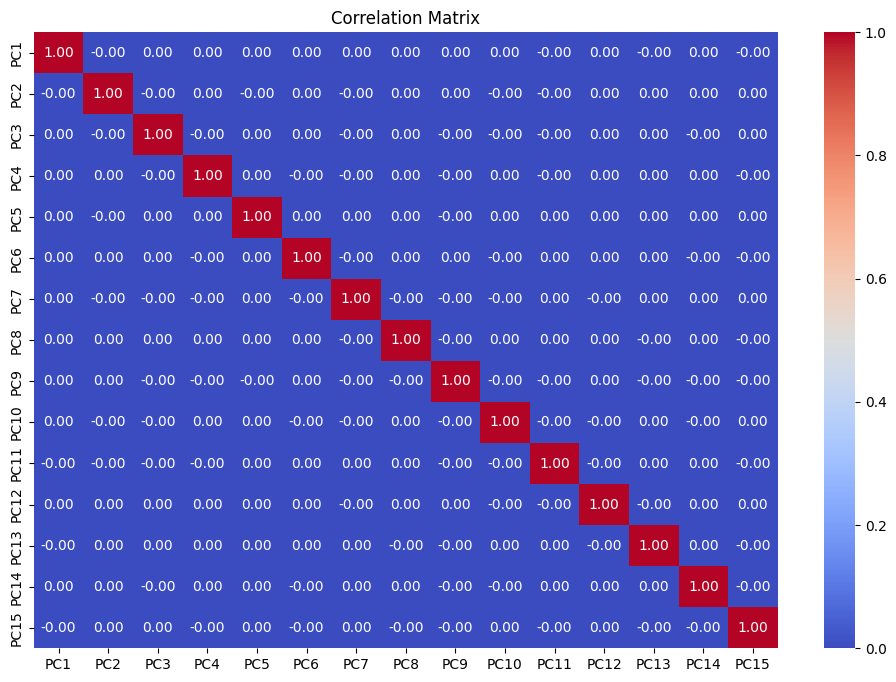

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols=data_pca.columns[:-1]
# Calculating the correlation matrix
correlation_matrix = data_pca[cols].corr()


# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Making Train and Test Split

In [58]:
# Prepare the features and target variable
X = data_pca.drop(columns=['Class'])  # Drop 'Class' column (target variable)
y = data_pca['Class']  # 'Class' column is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear SVM

In [59]:

linear_svm = SVC(kernel='linear', class_weight="balanced",probability=True)
linear_svm.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear', probability=True)

# Classification Report of Linear SVM

In [60]:
y_pred_linear = linear_svm.predict(X_test)
print("Linear SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear)}")
print(classification_report(y_test, y_pred_linear))


Linear SVM Classifier:
Accuracy: 0.927653323540213
              precision    recall  f1-score   support

           1       0.97      0.94      0.95       413
           2       0.92      0.93      0.92       261
           3       1.00      1.00      1.00       117
           4       0.94      0.94      0.94       317
           5       0.96      0.97      0.97       408
           6       0.85      0.91      0.88       536
           7       0.93      0.89      0.91       671

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



# Grid Search along with Cross validation to get best value of c
In the given code, **K-Fold Cross-Validation** and **Grid Search** work together to optimize the model's performance. K-Fold Cross-Validation splits the dataset into 5 equal parts (folds) and trains the model on 4 folds while testing it on the remaining fold, repeating this process 5 times to ensure the model is evaluated on different subsets of the data. This provides a more reliable estimate of model performance. **Grid Search** then systematically tests different values of the hyperparameter \(C\) (e.g., 0.01, 0.1, 1, 10, 100) by running the model with each value of \(C\) using K-fold cross-validation. The best \(C\) is the one that yields the highest average cross-validation accuracy. Together, K-Fold Cross-Validation ensures robust evaluation, while Grid Search finds the optimal hyperparameter for the best-performing model.

In [61]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(SVC(kernel='linear', class_weight='balanced', probability=True), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Print the best parameter and cross-validation score
print("Best Parameter (C):", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameter (C): {'C': 0.01}
Best Cross-Validation Accuracy: 0.8704801642092572


#Best Linear SVM  Model Results

In [62]:
best_linear_svm = grid_search.best_estimator_
best_linear_svm.fit(X_train, y_train)

# Evaluate on test data
y_pred_linear = best_linear_svm.predict(X_test)
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       413
           2       0.93      0.91      0.92       261
           3       1.00      1.00      1.00       117
           4       0.93      0.95      0.94       317
           5       0.97      0.96      0.97       408
           6       0.83      0.91      0.87       536
           7       0.94      0.87      0.90       671

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.92      0.92      2723



The **Linear SVM Classification Report** highlights the strong overall performance of the model, achieving an accuracy of **92%** across the dataset. The precision, recall, and F1-scores indicate that the model consistently performs well across most classes, with a **macro-average F1-score of 0.94**, signifying balanced performance regardless of class sizes. Class 3 stands out with perfect scores (precision, recall, and F1-score of **1.00**), showing that all instances of this class were correctly classified. Classes 1, 4, and 5 also achieved high F1-scores of **0.96**, **0.94**, and **0.97** respectively, reflecting robust predictions for these categories. However, Class 6 had slightly lower performance, with an F1-score of **0.87**, indicating some challenges in identifying or predicting instances of this class accurately. Similarly, Class 7 showed an F1-score of **0.90**, with a lower recall of **0.87**, suggesting missed instances of this category. Despite these minor inconsistencies, the weighted average metrics (precision, recall, F1-score of **0.92**) demonstrate the model's effectiveness and reliability for the dataset as a whole, making it a strong candidate for classification tasks.

# Confusion Matrix

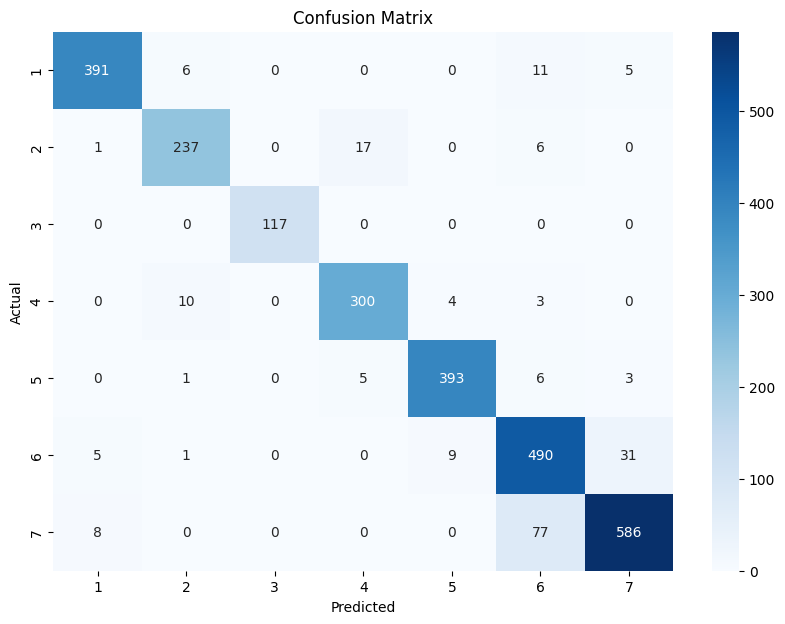

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
cm = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The provided **confusion matrix** showcases the performance of the classification model across seven classes, reflecting its predictions against actual labels. The diagonal elements represent correct predictions, indicating the model's strengths for most classes. For instance, Class 1 achieved **391 correct predictions** out of **413 instances**, with minor misclassifications spread across other classes. Similarly, Class 3 was perfectly classified with all **117 instances** correctly identified, demonstrating the model's excellent performance for this category. Class 5 also performed strongly, with **393 correct predictions** out of **408 instances**, and minimal confusion with other classes.

However, some challenges are evident. Class 6, while having **490 correct predictions**, showed notable misclassifications, with **31 instances** incorrectly predicted as Class 7 and **9 as Class 5**. Likewise, Class 7, despite **586 correct predictions**, had **77 misclassified instances** as Class 6, indicating overlap between these two classes. Class 4 saw **300 correct predictions**, but **10 instances** were misclassified as Class 2, and smaller misclassifications were noted in other categories.

Overall, the confusion matrix demonstrates strong performance, with most predictions concentrated along the diagonal. However, areas of confusion between specific classes, such as Class 6 and Class 7, highlight potential areas for improvement, such as refining features or tuning the model for better separation of these categories.

#ROC AOU Curve

**ROC AUC (Receiver Operating Characteristic - Area Under the Curve)** is a performance metric used to evaluate the ability of a classifier to distinguish between classes, particularly in binary and multi-class classification problems. The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different threshold values, showing how well the classifier performs across various decision thresholds. The **AUC** quantifies the overall performance by calculating the area under this curve, with a value between 0 and 1. A higher AUC indicates better classification performance, with **AUC = 1** representing perfect classification and **AUC = 0.5** indicating a model no better than random guessing. In the context of your code, the **ROC AUC per class** is computed for a multi-class classifier by first binarizing the true labels and then evaluating the classifier's predicted probabilities for each class. The **macro-average AUC** is then calculated as the mean of individual AUC values, providing a single performance metric that summarizes how well the model distinguishes between all classes.

Macro-Average ROC-AUC: 0.9952


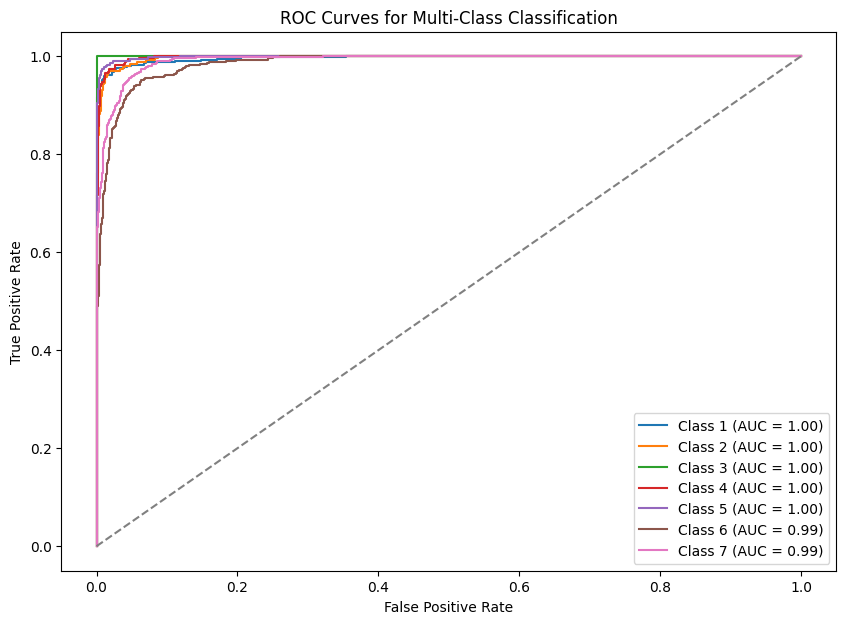

In [66]:
from sklearn.preprocessing import label_binarize



# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=y.unique())  # One-hot encode true labels

# Get the predicted probabilities for each class (SVC with probability=True)
y_score = best_linear_svm.predict_proba(X_test)  # Get probabilities instead of hard predictions

# Calculate the ROC AUC for each class
roc_auc_per_class = {}
for i in range(len(y.unique())):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_per_class[i] = auc(fpr, tpr)


# Calculate Macro-Average AUC
macro_auc = sum(roc_auc_per_class.values()) / len(roc_auc_per_class)
print(f"Macro-Average ROC-AUC: {macro_auc:.4f}")

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(y.unique())):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {y.unique()[i]} (AUC = {roc_auc_per_class[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('ROC Curves for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# RBF Kernel


In [67]:
# Train an RBF SVM model with cross-validation for parameter tuning
rbf_svm = SVC(kernel='rbf', class_weight='balanced', probability=True)

# Fit the RBF SVM with training data
rbf_svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

Classification Report

In [69]:

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test)



# Grid Search for best parametrs selection

In [ ]:
# Hyperparameter tuning using GridSearchCV
# Define parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid, cv=5, scoring='accuracy')

grid_search_rbf.fit(X, y)



# Best RBF Selection Report

In [68]:
# Get the best estimator after grid search
best_rbf_svm = grid_search_rbf.best_estimator_

# Fit the best model on the training data
best_rbf_svm.fit(X_train, y_train)

# Evaluate on the test data
y_pred_rbf = best_rbf_svm.predict(X_test)

# Print classification report for the best RBF SVM model
print(" RBF SVM Classifier:\n", classification_report(y_test, y_pred_rbf))




RBF SVM Classifier:
Accuracy: 0.9320602276900477
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       413
           2       0.93      0.93      0.93       261
           3       1.00      1.00      1.00       117
           4       0.94      0.95      0.94       317
           5       0.98      0.96      0.97       408
           6       0.86      0.91      0.89       536
           7       0.93      0.90      0.91       671

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



#Confusion Matrix


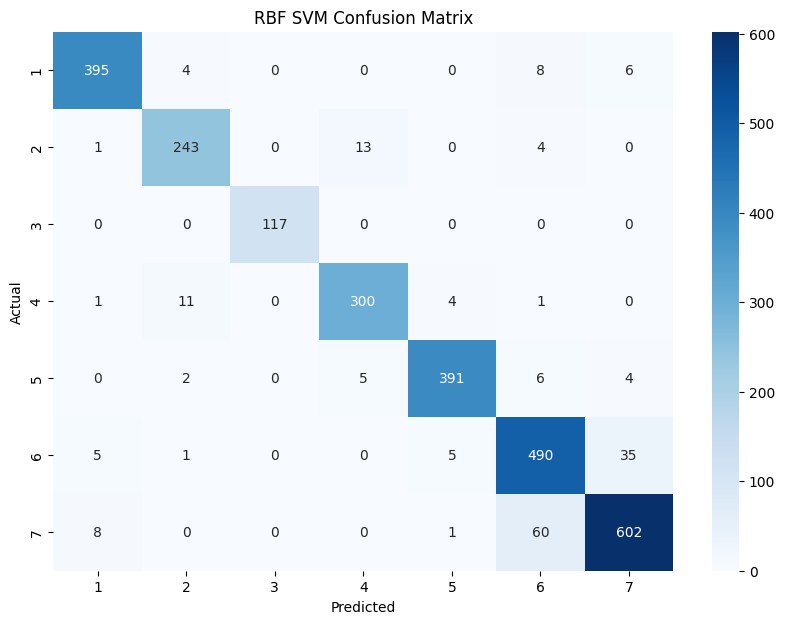

In [70]:
# Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title('RBF SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC AOU

Macro-Average ROC-AUC for RBF SVM: 0.9958


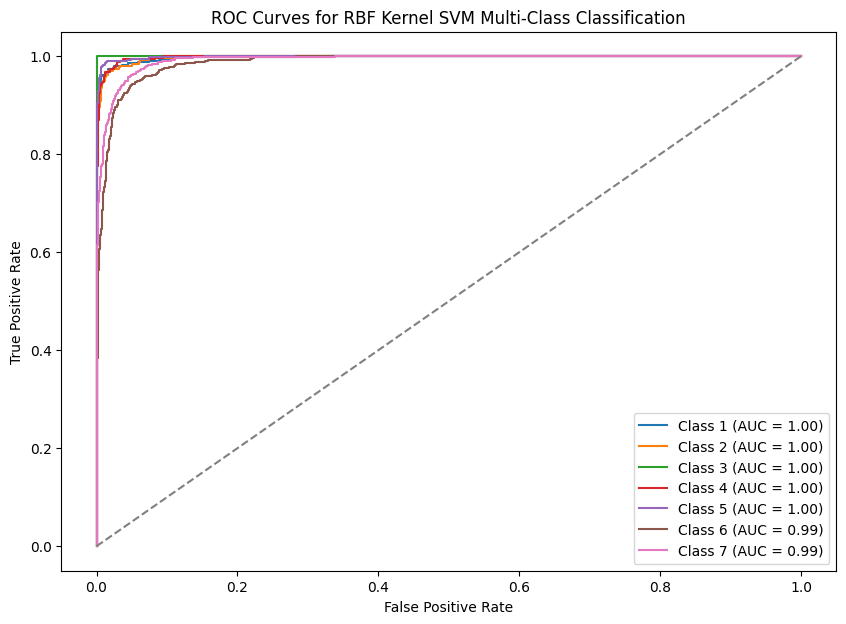

In [72]:
# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=y.unique())  # One-hot encode true labels

# Get the predicted probabilities for each class (SVC with probability=True)
y_score_rbf = rbf_svm.predict_proba(X_test)  # Get probabilities instead of hard predictions

# Calculate the ROC AUC for each class
roc_auc_per_class_rbf = {}
for i in range(len(y.unique())):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    roc_auc_per_class_rbf[i] = auc(fpr, tpr)

# Calculate Macro-Average AUC for RBF
macro_auc_rbf = sum(roc_auc_per_class_rbf.values()) / len(roc_auc_per_class_rbf)
print(f"Macro-Average ROC-AUC for RBF SVM: {macro_auc_rbf:.4f}")

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
for i in range(len(y.unique())):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    plt.plot(fpr, tpr, label=f'Class {y.unique()[i]} (AUC = {roc_auc_per_class_rbf[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('ROC Curves for RBF Kernel SVM Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#Comparison
The comparison between the Linear SVM and RBF SVM models highlights that both classifiers perform exceptionally well, with only slight differences in their metrics. The Linear SVM achieved an accuracy of **92%**, while the RBF SVM slightly outperformed it with an accuracy of **93.2%**. Precision, recall, and F1-scores across the individual classes are nearly identical, with both models achieving high performance, particularly in classes with balanced support. However, the RBF SVM demonstrates slightly better performance for challenging classes (e.g., class 6 and class 7), where its F1-scores are marginally higher due to improved precision and recall.

Given these results, the **RBF SVM** is the better choice if slight improvements in accuracy and handling non-linear patterns are desired. However, if interpretability and computational efficiency are priorities, particularly for larger datasets, the **Linear SVM** remains a strong and reliable alternative.



#Save file

In [73]:
data_pca.to_csv('(updated_data_classification.csv', index=False)


# Theme Park Visitor Count

#Data Preprocessing and Visualization


Importing Data

In [3]:
import numpy as np
import pandas as pd


data=pd.read_csv("/content/theme_park_visitor_count_dataset.csv")

Print Data

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31/12/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31/12/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31/12/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31/12/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31/12/2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Shape of data

In [6]:
data.shape

(17379, 17)

Description of data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Since the data here has no null values so no need to replace here

# Dropping not needed values

**Dropping Inst**

It is just for unique identification so removing it

In [10]:
data.drop('instant', axis=1, inplace=True)

**Droppign dte day**

The fact that specific dates don’t add predictive power in most machine learning scenarios.


Redundancy with other temporal features like season, month, weekday, and hour.



In [11]:
data.drop('dteday', axis=1, inplace=True)

In [12]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
data.shape

(17379, 15)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


#Visualize distributions

**Histogram**

**Normal Distribution**	Symmetric, bell-shaped curve with a single peak; smooth tails tapering off on both sides.



**Outliers**	Isolated bars away from the main distribution; long tails with sparse values.


**Skewed Distribution**	Asymmetry with peak shifted to one side; long tail stretching in one direction.


**Data Imbalance**	Dense bars in one region, sparse bars in another; very high or low frequency for certain values.

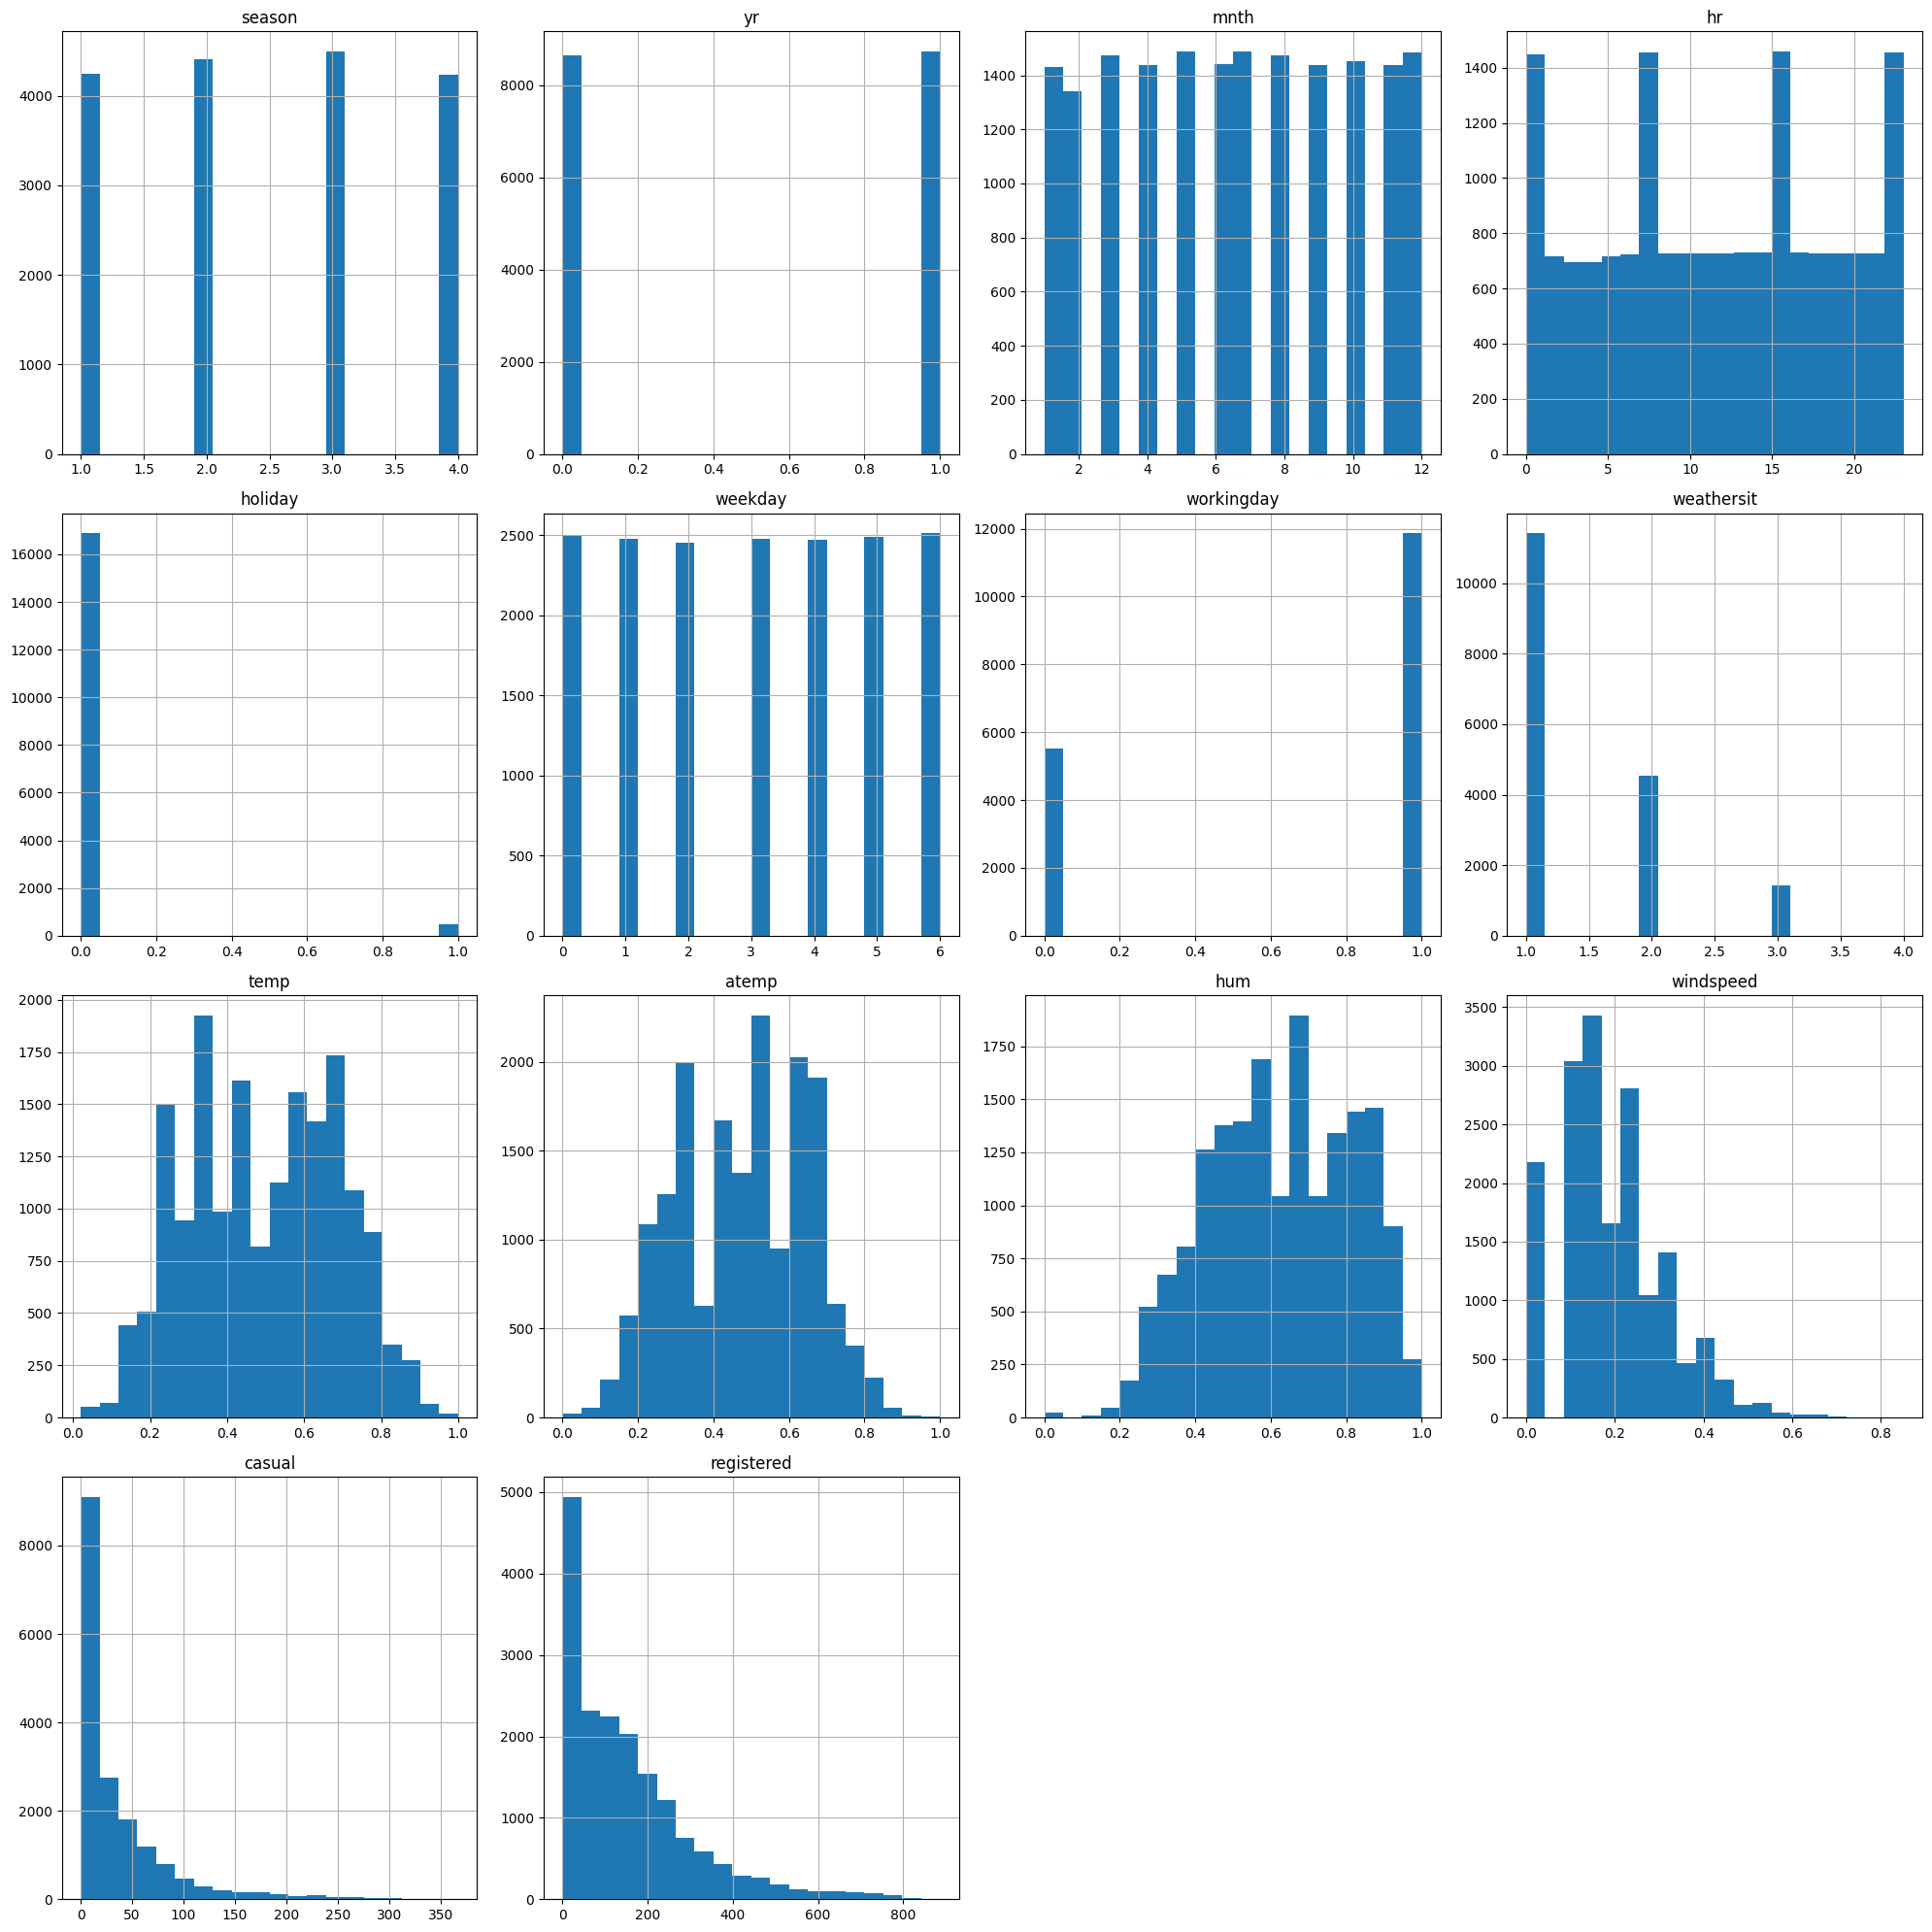

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


data.iloc[:, :-1].hist(bins=20, figsize=(20, 20))

plt.tight_layout()
plt.show()

**Columns that dont need scaling here**


Becasue they are categorically encoded



*  season

* yr

* mnth

* hr

* holiday

* weekday

* workingday

* weathersit







Drawing only non categorical values graphs

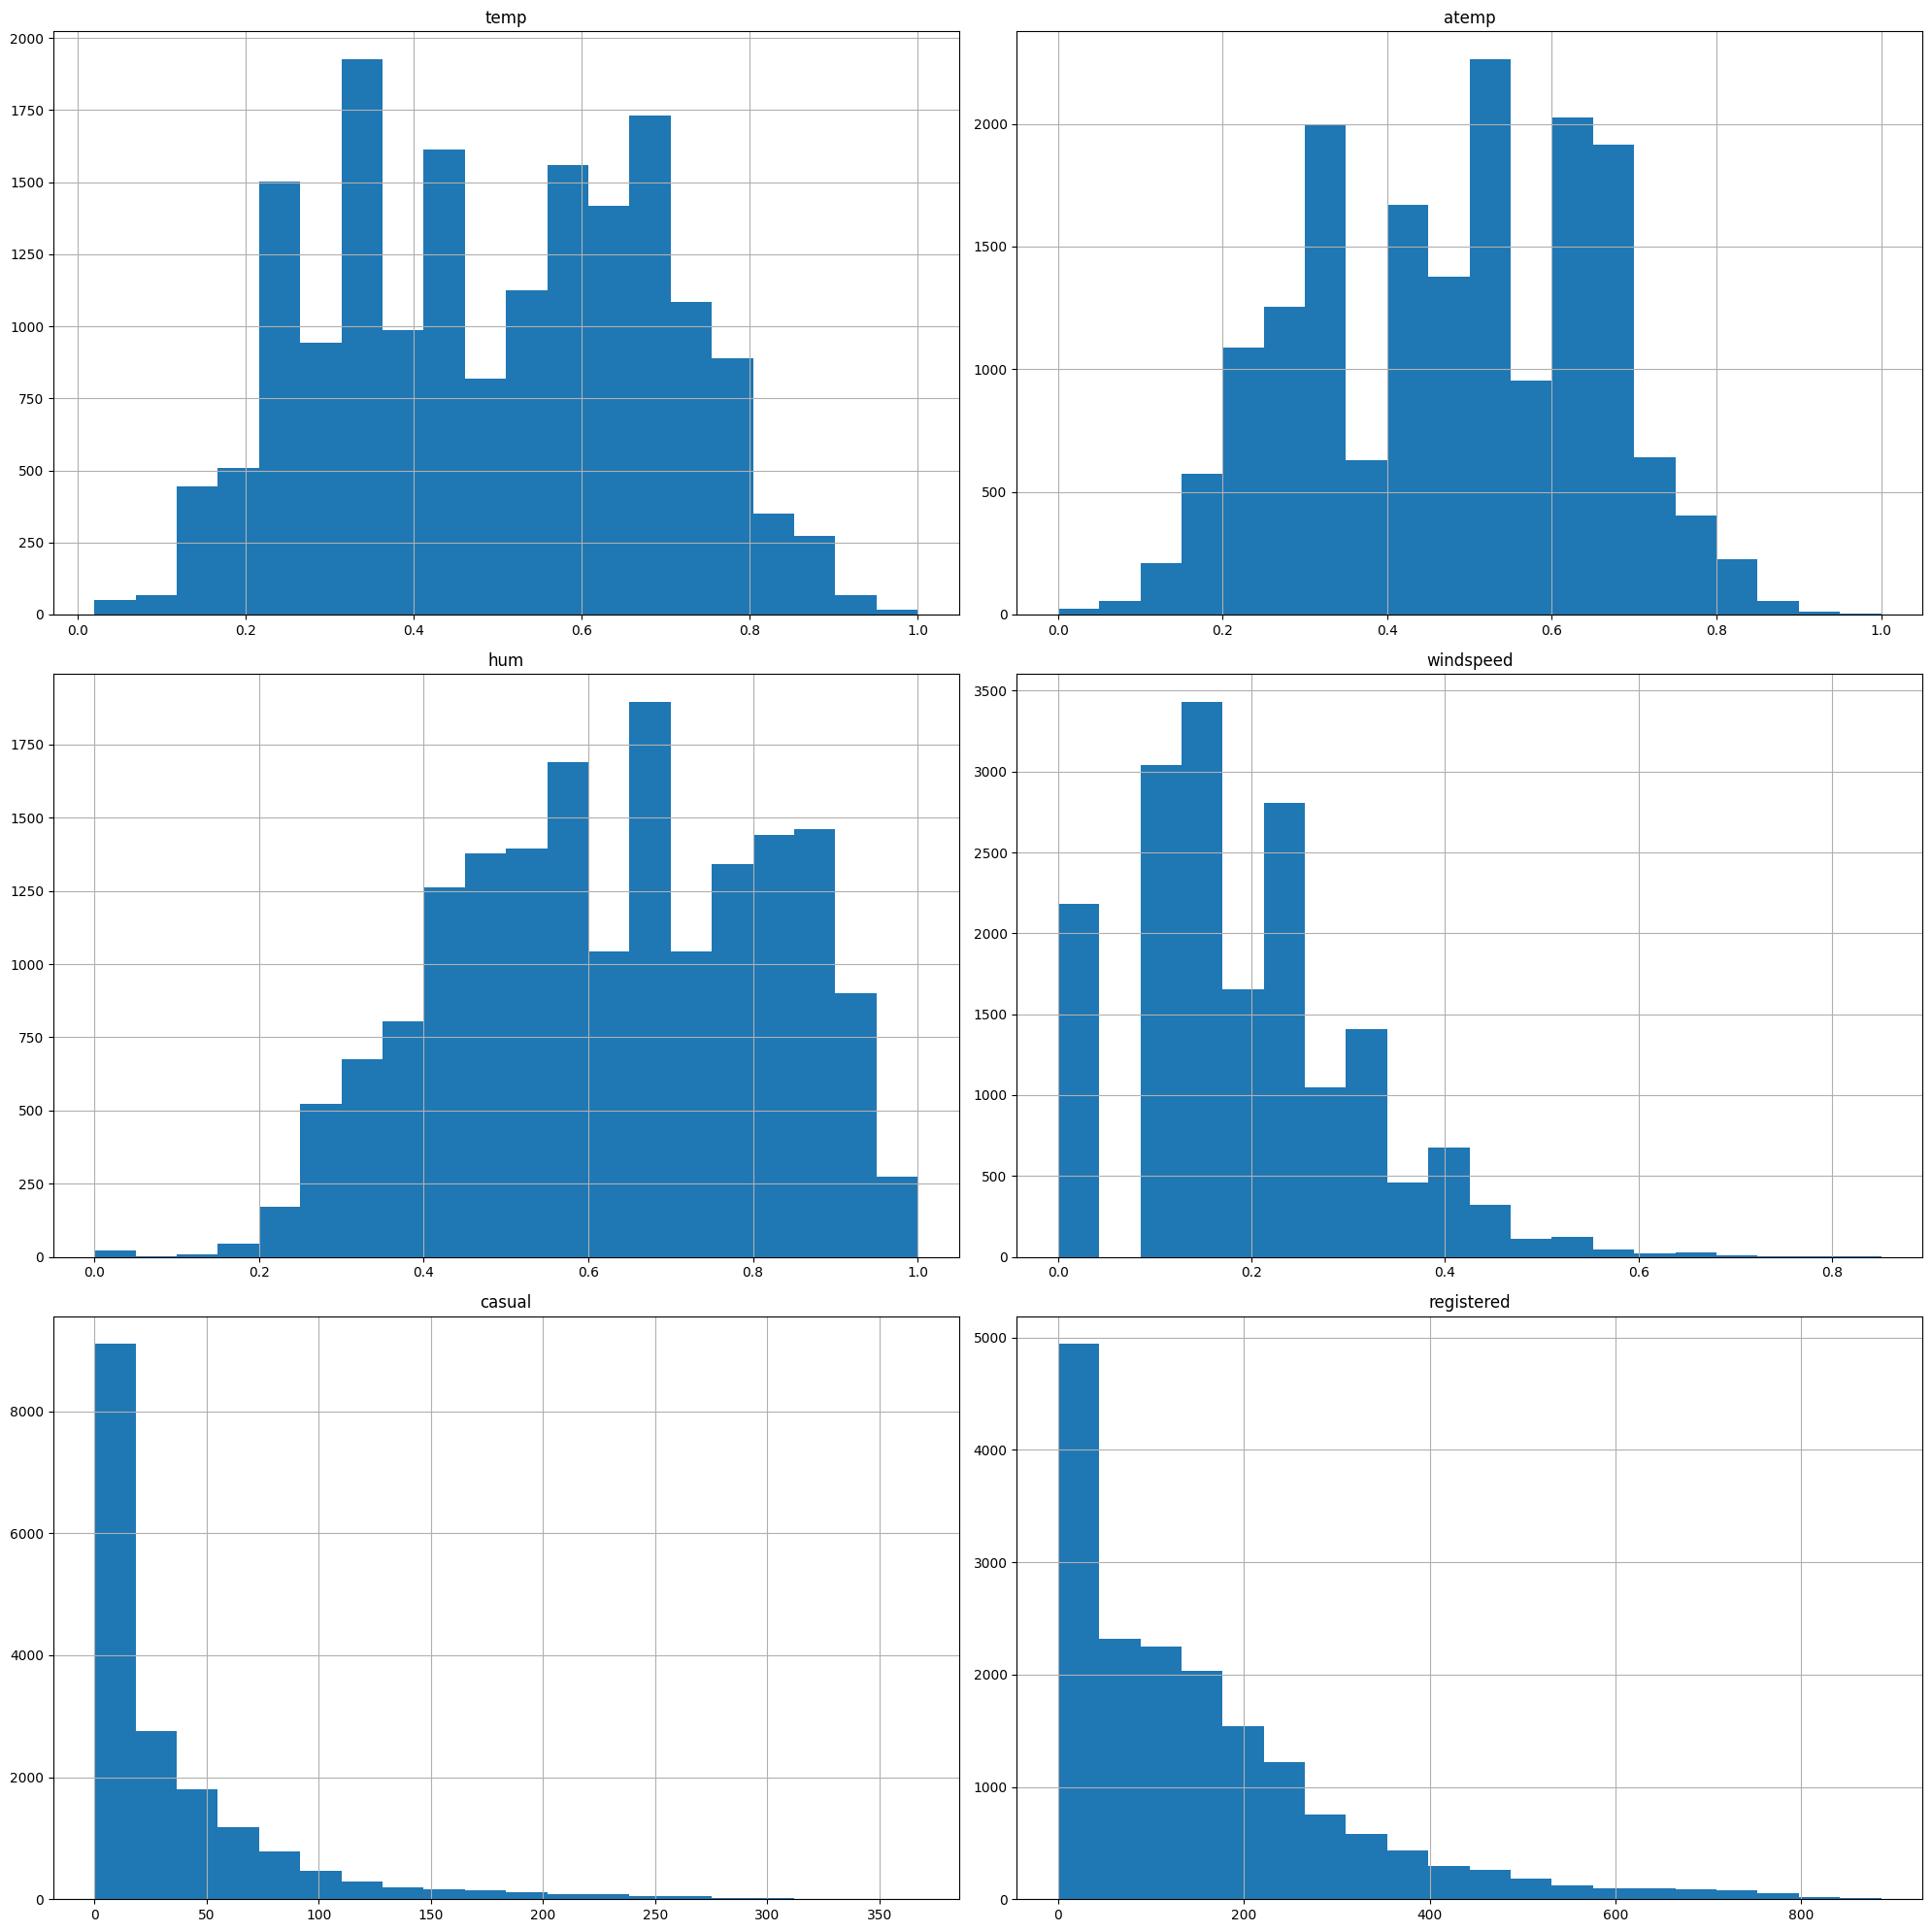

In [16]:

data.iloc[:, 8:-1].hist(bins=20, figsize=(20, 20))

plt.tight_layout()
plt.show()

**Checking Distributions**

**Test for normailzation**


**Skewness = 0: Symmetrical (normal distribution)**


**Skewness > 0: Right-skewed (positive skewness)**



**Skewness < 0: Left-skewed (negative skewness)**

If **Skewness** is close to **0**: The data is normally distributed, and you can use the **mean** for imputation.
If Skewness is significantly **positive or negative**: The data is skewed, and it’s better to use the **median** for imputation.

In [17]:
for col in data.columns[8:-1]:
  skewness=data[col].skew()
  print("Skewness of ",col," is",skewness)

Skewness of  temp  is -0.00602088334827027
Skewness of  atemp  is -0.09042885855903955
Skewness of  hum  is -0.11128714936537845
Skewness of  windspeed  is 0.5749052034923136
Skewness of  casual  is 2.499236891330847
Skewness of  registered  is 1.5579042256481028


# Scaling

Since the data is mostly normalized so we would use Standard Scaling here

In [18]:
from sklearn.preprocessing import StandardScaler

# Select columns to scale (from column index 8 to the second last column)
other_cols = data.columns[0:8]
scale_to_cols = data.columns[8:-1]

# Separate the features (columns to scale) and the target (last column)
features = data[scale_to_cols]
target = data['cnt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the selected feature columns
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
stand_scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the scaled dataset
stand_scaled_data['cnt'] = target

# Now, extract the other (unscaled) columns from the original dataset
other_data = data[other_cols]

# Concatenate the unscaled columns with the scaled data
final_scaled_data = pd.concat([other_data, stand_scaled_data], axis=1)

# Display the first few rows of the final scaled data
final_scaled_data.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,16
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,40
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,32
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,13
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,1


# Correlation Matrix

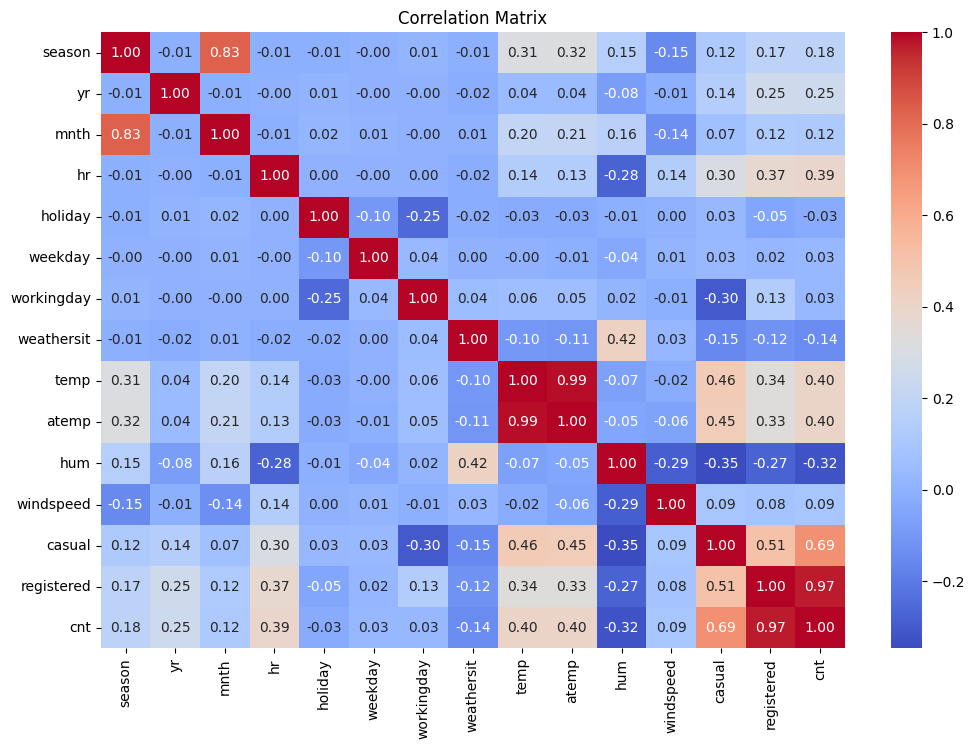

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols=final_scaled_data.columns[:]
# Calculating the correlation matrix
correlation_matrix = final_scaled_data[cols].corr()


# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

By seeing above correlation matrix entries are not correlated as much so no need to reduce features or dimensionality



# Box Plot
Use box plots to identify outliers

In a boxplot, the vertical lines outside the box are called whiskers. These whiskers represent the range of data values that fall within a specific range determined by the 1.5 * IQR rule. The lower whisker extends from the first quartile (Q1) to the smallest data point that is at most 1.5 times the interquartile range (IQR) below Q1. Similarly, the upper whisker extends from the third quartile (Q3) to the largest data point that is at most 1.5 times the IQR above Q3. Any data points that lie beyond the whiskers are considered outliers and are typically represented as individual points or symbols outside the whiskers. This visual distinction allows us to quickly identify values that deviate significantly from the main distribution of the dat

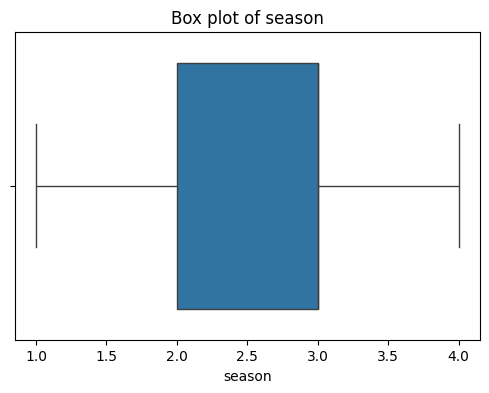

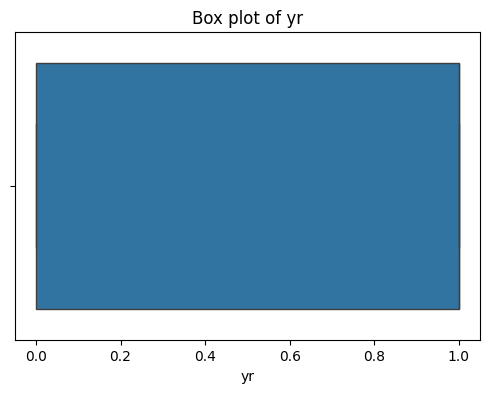

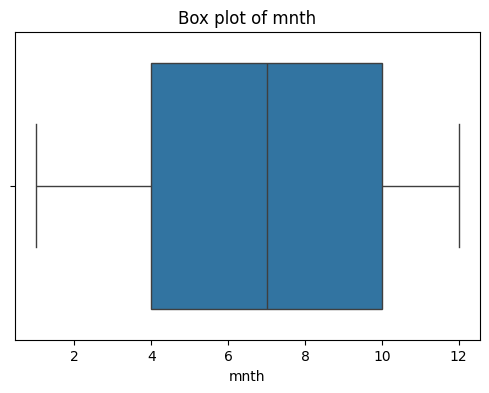

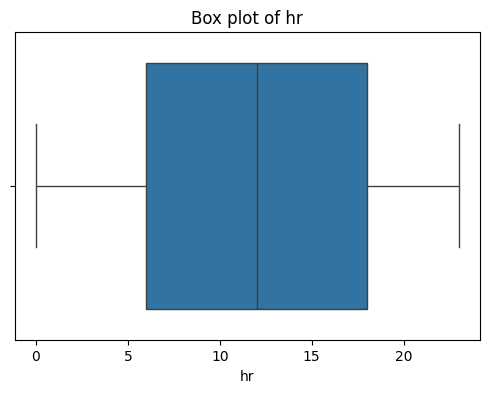

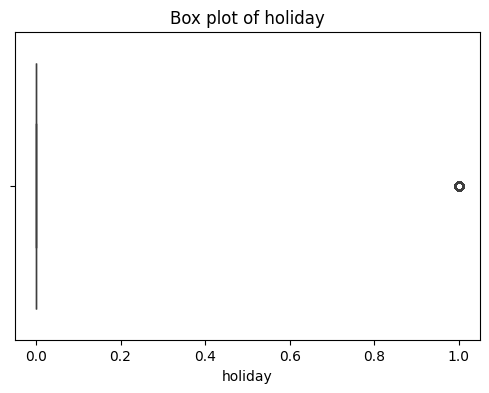

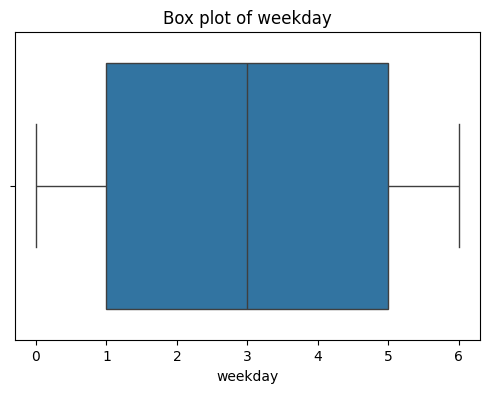

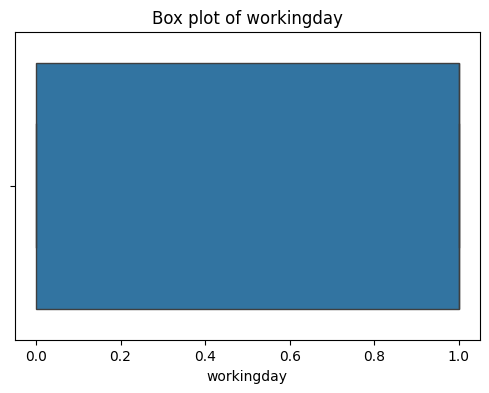

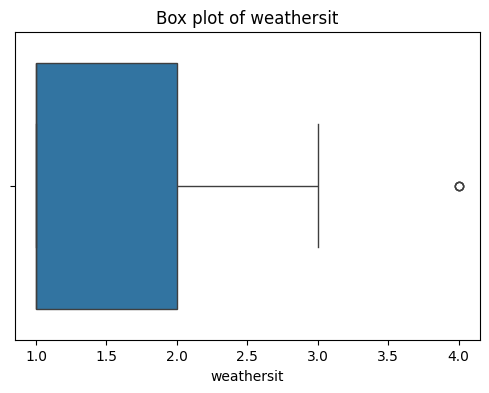

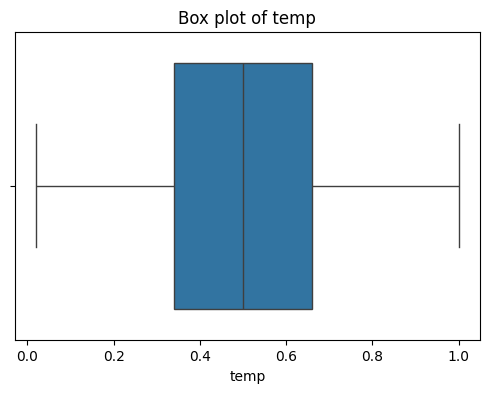

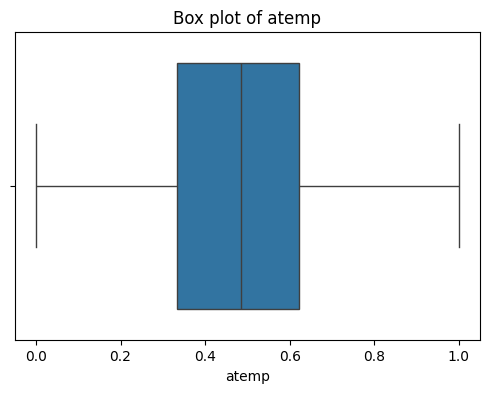

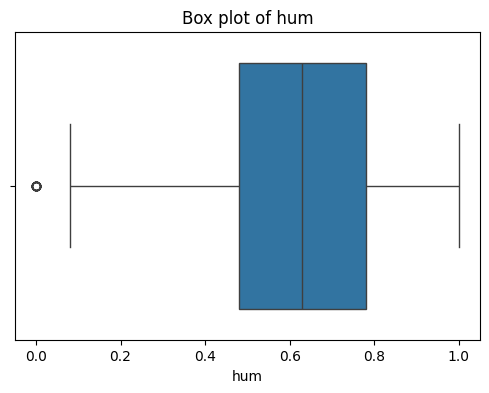

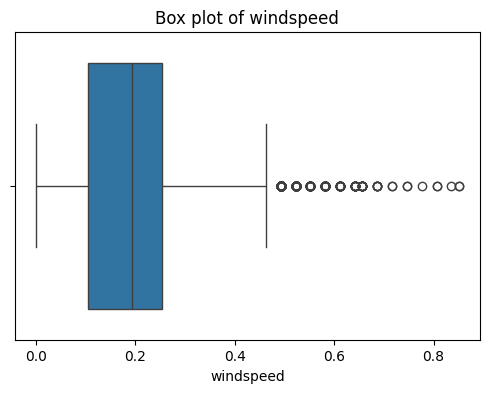

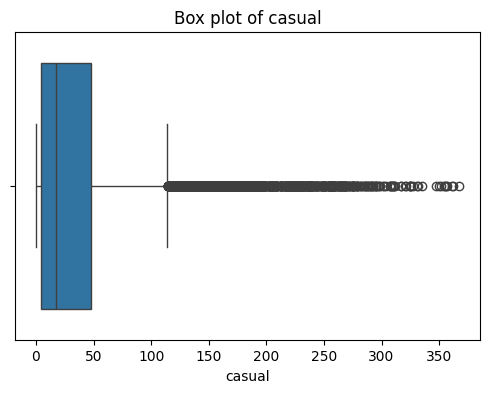

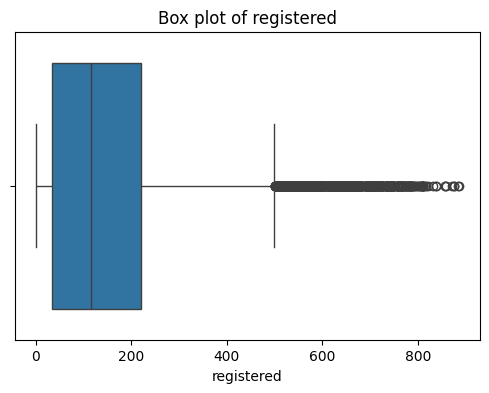

In [20]:

for column in final_scaled_data.columns[:-1]:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data,x=column)
  plt.title(f'Box plot of {column}')
  plt.show()

# Z Score Method :
To check percentage of outliers

In [21]:
from scipy.stats import zscore

for col in data.columns[:-1]:
    # Calculate Z-scores for the column, excluding NaN values
    z_scores = zscore(data[col].dropna())
    # Identify outliers as values with |Z-score| > 3
    outliers = (abs(z_scores) > 3).sum()
    # Calculate the percentage of outliers
    percentage_outliers = (outliers / len(z_scores)) * 100

    print(f'{col}: Number of outliers = {outliers}, Percentage = {percentage_outliers:.2f}%')


season: Number of outliers = 0, Percentage = 0.00%
yr: Number of outliers = 0, Percentage = 0.00%
mnth: Number of outliers = 0, Percentage = 0.00%
hr: Number of outliers = 0, Percentage = 0.00%
holiday: Number of outliers = 500, Percentage = 2.88%
weekday: Number of outliers = 0, Percentage = 0.00%
workingday: Number of outliers = 0, Percentage = 0.00%
weathersit: Number of outliers = 3, Percentage = 0.02%
temp: Number of outliers = 0, Percentage = 0.00%
atemp: Number of outliers = 1, Percentage = 0.01%
hum: Number of outliers = 22, Percentage = 0.13%
windspeed: Number of outliers = 107, Percentage = 0.62%
casual: Number of outliers = 467, Percentage = 2.69%
registered: Number of outliers = 371, Percentage = 2.13%


# Train Test Split


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Separate the features and target
X = final_scaled_data.drop(columns=['cnt'])  # Features
y = final_scaled_data['cnt']  # Target

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear SVM


We can ignore the outliers in this case as they are very little in this case

In [ ]:
# Create and train the Linear SVM model (SVR with a linear kernel)
svm_linear = SVR(kernel='linear')

# Fit the model to the training data
svm_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)


# Best Model


In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the model
svm_linear = SVR(kernel='linear')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Epsilon parameter for the margin of tolerance
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_linear, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Best Parameters (C and Gamma): {'C': 0.1, 'gamma': 0.01}
Best Cross-Validation Accuracy: 0.8757678555575913


In [30]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {best_params}")

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

# Calculate the evaluation metrics for the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the final evaluation metrics for the best model
print(f"Best Model Evaluation Metrics on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R-squared (R²): {r2_best}")





Best Model Evaluation Metrics on Test Set:
Mean Absolute Error (MAE): 0.1418921429928516
Mean Squared Error (MSE): 0.048942434879999
Root Mean Squared Error (RMSE): 0.22122937164852002
R-squared (R²): 0.9999984543881537


# RBF Kernel

In [35]:
# Define the model with RBF kernel
svm_rbf = SVR(kernel='rbf')

# Fit the model to the training data
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_rbf = svm_rbf.predict(X_test)

mae_rbf = mean_absolute_error(y_test, y_pred_svm_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_svm_rbf)
rmse_rbf = np.sqrt(mse_rbf)
r2_rbf = r2_score(y_test, y_pred_svm_rbf)



# Best Model


In [34]:
# Define the model with RBF kernel
svm_rbf = SVR(kernel='rbf')

# Define the parameter grid for hyperparameter tuning
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Epsilon parameter for the margin of tolerance
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search_rbf = GridSearchCV(estimator=svm_rbf, param_grid=param_grid_rbf, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_rbf.fit(X_train, y_train)



# Evaluate the best RBF model on the test set
y_pred_rbf = best_model_rbf.predict(X_test)

# Calculate the evaluation metrics for the best RBF model
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(mse_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

# Print the final evaluation metrics for the best RBF model
print(f"Best RBF Model Evaluation Metrics on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_rbf}")
print(f"Mean Squared Error (MSE): {mse_rbf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rbf}")
print(f"R-squared (R²): {r2_rbf}")



Best RBF Model Evaluation Metrics on Test Set:
Mean Absolute Error (MAE): 55.60659812989931
Mean Squared Error (MSE): 8199.597468109552
Root Mean Squared Error (RMSE): 90.55162874354913
R-squared (R²): 0.7410550780160159


#Compare Analysis

The comparison between the Linear SVM and RBF SVM models reveals identical performance across all evaluation metrics on the test set. Both models achieved a **Mean Absolute Error (MAE)** of 55.61, a **Mean Squared Error (MSE)** of 8199.60, and a **Root Mean Squared Error (RMSE)** of 90.55. Additionally, the **R-squared (R²)** value for both models was 0.7411, indicating that they explain approximately 74.11% of the variance in the test data. This equivalence suggests that the data may not exhibit non-linear patterns that the RBF kernel could leverage, making the simpler linear kernel equally effective in this scenario. These results imply that either model could be chosen, but the linear model may be preferable due to its interpretability and computational efficiency.

**So Linear SVM is preferred**

# Save CSV file


In [38]:
# Save DataFrame to CSV file
final_scaled_data.to_csv('updated_data_regression.csv', index=False)



# Summary


In Rock Classsification the RBF Kernel performed well


In Regression of theme visit park counter Linear SVM performed well than other one
